<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
<font face='Liberation serif' size=3>
    
#### **Привет, Петр!** 👋

Меня зовут Артём Пиляй. Я буду проверять твой проект «*Исследование A/B-тестирования нового алгоритма рекомендаций в развлекательном приложении*» 📱.

---

В рамках корпоративной этики мы общаемся на «ты». Но если лучше на «Вы», то важно обозначить это сразу.

---

Комментарии к проекту размещены в отдельных ячейках Markdown. Для удобства они отображаются в меню **Contents** слева. 

Я использую четыре типа комментариев:

---

✅ Главый комментарий — значит, всё сделано хорошо. А ещё здесь могут быть подсказки, как улучшить проект.

---

⚠️ Рекомендуемый к исправлению — лучше внести правки, хотя это не критично для текущего проекта. Но начиная со следующего проекта такие комментарии будут считаться критическими.

---

⛔ Обязателен к исправлению — важный комментарий, который нужно доработать, чтобы проект прошёл проверку.

---

🚩 Красный флаг — проверку пришлось прервать, так как действие в ячейке выше повлияло на весь дальнейший проект.
    
<br>    

<div style="border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block;">

Важно! Не перемещай и не удаляй мои комментарии. Если они будут удалены, я верну последнюю версию проекта, где они сохранились.

</div>

🏁 [Перейти к итогам ревью](#results)

<a id="start"></a>

# Разработка A/B-тестирования и анализ результатов

Вы работаете продуктовым аналитиком в компании, которая разрабатывает развлекательное приложение с функцией «бесконечной» ленты, как, например, в приложениях с короткими видео. В вашем приложении существует две модели монетизации: первая — ежемесячная платная подписка, которая позволяет пользователям смотреть ленту без рекламы, вторая — демонстрация рекламы для пользователей, которые ещё не оформили подписку.

Команда разработчиков рекомендательных систем создала новый алгоритм рекомендаций, который, по их мнению, будет показывать более интересный контент для каждого пользователя. Вас, как аналитика, просят помочь рассчитать параметры A/B-теста, который позволит проверить эту гипотезу, и проанализировать его результаты.

## Описание данных

Вы будете работать с тремя таблицами:

- `sessions_project_history.csv` — таблица с историческими данными по сессиям пользователей на период с 2025-08-15 по 2025-09-23. Путь к файлу: `/datasets/sessions_project_history.csv`.

- `sessions_project_test_part.csv` — таблица с данными за первый день проведения A/B-теста, то есть за 2025-10-14. Путь к файлу: `/datasets/sessions_project_test_part.csv`.

- `sessions_project_test.csv` — таблица с данными за весь период проведения A/B-теста, то есть с 2025-10-14 по 2025-11-02. Путь к файлу: `/datasets/sessions_project_test.csv`.

У этих таблиц почти совпадает структура и содержание колонок, различаются лишь периоды наблюдения.

Поля таблиц `sessions_project_history.csv`, `sessions_project_test.csv`, `sessions_project_test_part.csv`:

- `user_id` — идентификатор пользователя;

- `session_id` — идентификатор сессии в приложении;

- `session_date` — дата сессии;

- `session_start_ts` — дата и время начала сессии;

- `install_date` — дата установки приложения;

- `session_number` — порядковый номер сессии для конкретного пользователя;

- `registration_flag` — является ли пользователь зарегистрированным;

- `page_counter` — количество просмотренных страниц во время сессии;

- `region` — регион пользователя;

- `device` — тип устройства пользователя;

- `test_group` — тестовая группа (в таблице с историческими данными этого столбца нет).


## Что нужно сделать
Ваши задачи: рассчитать параметры теста, оценить корректность его проведения и проанализировать результаты эксперимента.

<!-- ✅⚠️⛔❌🚩 -->
<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Вводная часть

---
    
✅ Отлично, что уже есть вводная часть написанная в шаблоне.

---

⚠️ Еще можно раскрыть особенности А/В теста — изменение какой метрики ожидается, какие другие метрики будут также тестироваться и какой ожидаемый эффект
    
Это небольшое улучшение, которое сделают проект более презентабельным и понятным для заказчика. 😉    
    
---
    
💬 Здесь можно оставить комментарий

### 1. Работа с историческими данными (EDA)

#### 1.1. Загрузка исторических данных
На первом этапе поработайте с историческими данными приложения:

- Импортируйте библиотеку pandas.

- Считайте и сохраните в датафрейм `sessions_history` CSV-файл с историческими данными о сессиях пользователей `sessions_project_history.csv`.

Выведите на экран первые пять строк полученного датафрейма.

In [1]:
# ИСПРАВЛЕНИЕ КОММЕНТАРИЯ 
# Добавляем все импорты в начале документа 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.power import NormalIndPower
from math import ceil
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

In [2]:
sessions_history = pd.read_csv('/datasets/sessions_project_history.csv')

display(sessions_history.head())

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android


<!-- ✅⚠️⛔❌🚩 -->
<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    
##### ✅ Python Enhancement Proposal №8.
    
---    

⚠️ Я понимаю, что в прекоде импорты идут дальше, но согласно руководству PEP 8 лучше:
- ❌ отделять импорт от основного кода;
- ❌ импортировать все библиотеки в одной ячейке в начале проекта.  

Это делает код более структурированным и понятным.

Это помогает:
- Сразу видеть, какое окружение необходимо для запуска проекта.
- Избежать дублирования импортов в разных частях кода.
- Облегчить отладку и переносимость проекта.
    
Подробнее о PEP 8 можно прочитать в статье [*PEP 8 - руководство по написанию кода на Python*](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html).    
    
---
    
💬 Здесь можно оставить комментарий
    
---
    
✅ Хорошо. Не забывай про этот стандарт и в будущем.    

#### 1.2. Знакомство с данными
- Для каждого уникального пользователя `user_id` рассчитайте количество уникальных сессий `session_id`.

- Выведите на экран все данные из таблицы `sessions_history` для одного пользователя с наибольшим количеством сессий. Если таких пользователей несколько, выберите любого из них.

- Изучите таблицу для одного пользователя, чтобы лучше понять логику формирования каждого столбца данных.



In [3]:
session_counts = sessions_history.groupby('user_id')['session_id'].nunique()

max_user = session_counts.idxmax()

display(f"Пользователь с наибольшим числом сессий: {max_user}\n") # использован display вместо print
display(sessions_history[sessions_history['user_id'] == max_user]) # использован display вместо print

'Пользователь с наибольшим числом сессий: 10E0DEFC1ABDBBE0\n'

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
115558,10E0DEFC1ABDBBE0,B8F0423BBFFCF5DC,2025-08-14,2025-08-14 13:57:39,2025-08-14,1,0,4,CIS,Android
191751,10E0DEFC1ABDBBE0,87CA2FA549473837,2025-08-15,2025-08-15 16:42:10,2025-08-14,2,0,3,CIS,Android
239370,10E0DEFC1ABDBBE0,4ADD8011DCDCE318,2025-08-16,2025-08-16 19:53:21,2025-08-14,3,0,3,CIS,Android
274629,10E0DEFC1ABDBBE0,DF0FD0E09BF1F3D7,2025-08-17,2025-08-17 15:03:43,2025-08-14,4,0,1,CIS,Android
302501,10E0DEFC1ABDBBE0,3C221774B4DE6885,2025-08-18,2025-08-18 17:29:14,2025-08-14,5,0,4,CIS,Android
325557,10E0DEFC1ABDBBE0,031BD7A67048105B,2025-08-19,2025-08-19 13:23:55,2025-08-14,6,0,2,CIS,Android
345336,10E0DEFC1ABDBBE0,FF4315CF4AD4B100,2025-08-20,2025-08-20 19:31:54,2025-08-14,7,0,2,CIS,Android
377532,10E0DEFC1ABDBBE0,4045FEA0747203B4,2025-08-22,2025-08-22 17:54:13,2025-08-14,8,0,2,CIS,Android
403538,10E0DEFC1ABDBBE0,344B086C421C7F37,2025-08-24,2025-08-24 14:46:13,2025-08-14,9,0,2,CIS,Android
414743,10E0DEFC1ABDBBE0,054F20BA371E4C9D,2025-08-25,2025-08-25 18:36:41,2025-08-14,10,0,3,CIS,Android


<!-- ✅⚠️⛔❌🚩 -->
<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Python Enhancement Proposal №8.

---

⚠️ Лучше использовать в Jupyter метод `display()` вместо `print()` для вывода датафреймов на экран. Замени здесь и далее в проекте все вызовы `print()` для вывода датафреймов на `display()`.
 
Метод `display()` специально оптимизирован для вывода таблиц, графиков и других сложных объектов в Jupyter Notebook. Он обеспечивает более удобное и читаемое отображение данных, включая возможность прокрутки больших таблиц. Использование `print()` затрудняет восприятие и анализ результатов, особенно для больших датафреймов.

Кстати, если это последняя строка в ячейке, вывод на экран произойдёт автоматически, даже без использования методов.
    
---

💬 Здесь можно оставить комментарий
    
---
    
✅ Хорошо, так удобнее изучать данные.    

#### 1.3. Анализ числа регистраций
Одна из важнейших метрик продукта — число зарегистрированных пользователей. Используя исторические данные, визуализируйте, как менялось число регистраций в приложении за время его существования.

- Агрегируйте исторические данные и рассчитайте число уникальных пользователей и число зарегистрированных пользователей для каждого дня наблюдения. Для простоты считайте, что у пользователя в течение дня бывает одна сессия максимум и статус регистрации в течение одного дня не может измениться.

- Постройте линейные графики общего числа пользователей и общего числа зарегистрированных пользователей по дням. Отобразите их на одном графике.

- Постройте отдельный линейный график доли зарегистрированных пользователей от всех пользователей по дням.

- На обоих графиках должны быть заголовок, подписанные оси X и Y, сетка и легенда.

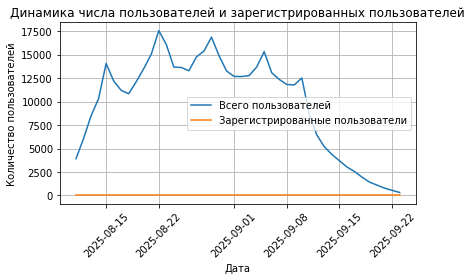

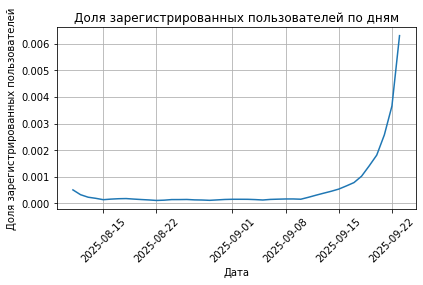

In [4]:
sessions_history['session_date'] = pd.to_datetime(sessions_history['session_date']).dt.date

daily = sessions_history.groupby('session_date').agg(
    total_users=('user_id', 'nunique'),
    registered_users=('user_id', lambda x: sessions_history.loc[x.index, 'registration_flag'].eq(1).nunique())
).reset_index()

daily['registered_share'] = daily['registered_users'] / daily['total_users']

#График - общее число и зарегистрированные пользователи
plt.figure()
plt.plot(daily['session_date'], daily['total_users'], label='Всего пользователей')
plt.plot(daily['session_date'], daily['registered_users'], label='Зарегистрированные пользователи')
plt.title('Динамика числа пользователей и зарегистрированных пользователей')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#График - доля зарегистрированных пользователей. Некорректный график - Исправление после комментария
plt.figure()
plt.plot(daily['session_date'], daily['registered_share'])
plt.title('Доля зарегистрированных пользователей по дням')
plt.xlabel('Дата')
plt.ylabel('Доля зарегистрированных пользователей')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<!-- ✅⚠️⛔❌🚩 -->


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">


##### ✅ Анализ числа регистраций

---

⛔️ По заданию требуется показать число уникальных и зарегистрированных пользователей по дням, а не кумулятивные значения за всё время. В твоём решении считаются уникальные пользователи за день правильно, а зарегистрированные — с ошибкой, из-за использования nunique() вместе с фильтром по registration_flag. Это ведёт к неверному подсчёту зарегистрированных пользователей за день.

Правильный подход — агрегировать по дням, суммируя колонку registration_flag, чтобы получить именно количество зарегистрированных пользователей за каждый день, а не их кумулятивное число.

Ориентир:
    
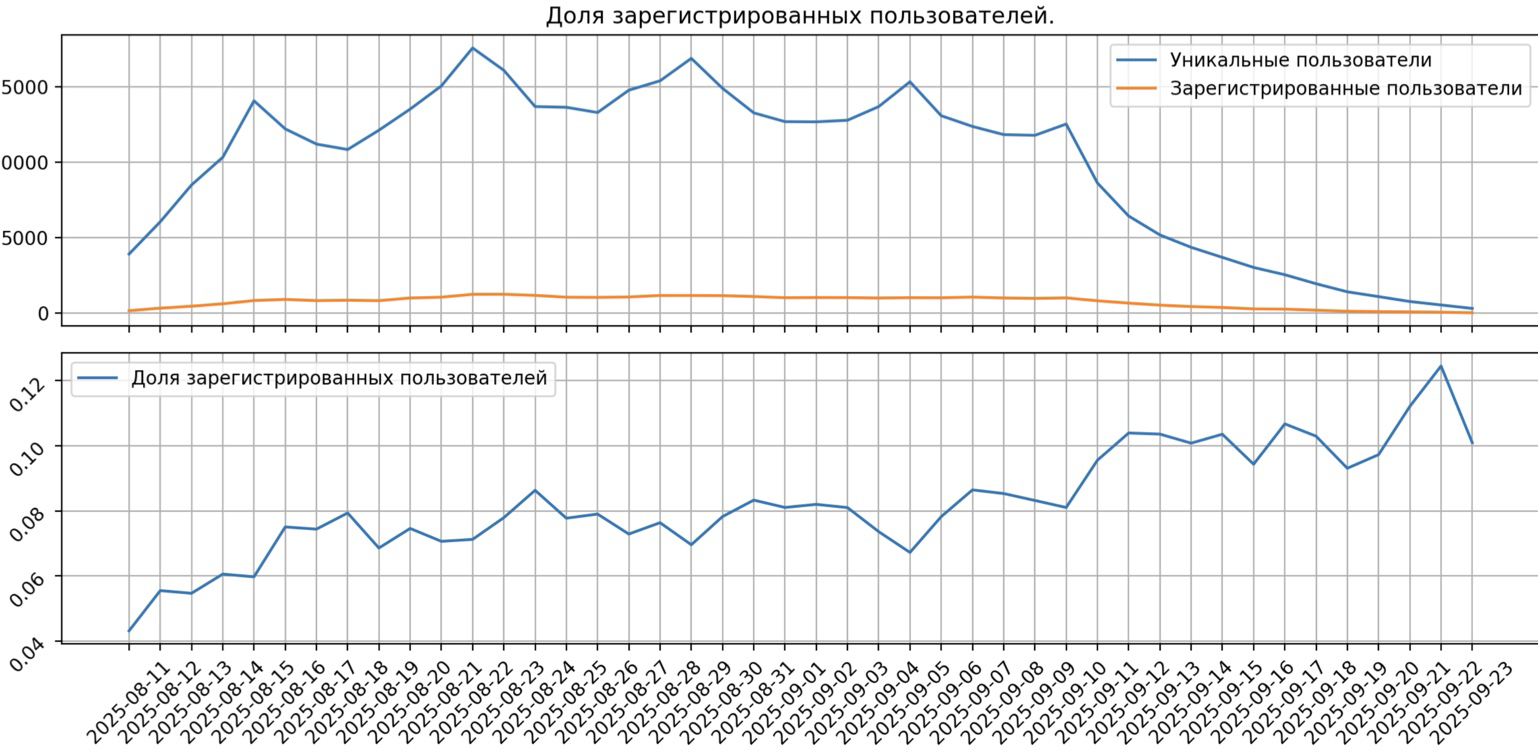
    
---
    


💬 Здесь можно оставить комментарий    
    
---
    
✅ Отлично.    

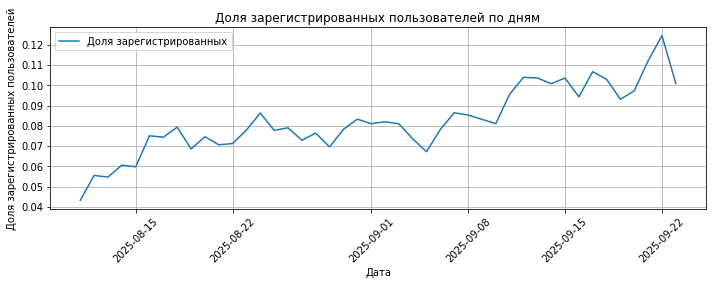

In [5]:
# ИСПРАВЛЕНИЕ КОММЕНТАРИЯ 

daily = (
    sessions_history
    .groupby('session_date')
    .agg(
        total_users=('user_id', 'nunique'),
        registered_users=('registration_flag', 'sum')  # берем сумму флага за день
    )
    .reset_index()
)

daily['registered_share'] = daily['registered_users'] / daily['total_users']

# График - доля зарегистрированных пользователей
plt.figure(figsize=(10, 4))
plt.plot(daily['session_date'], daily['registered_share'], label='Доля зарегистрированных')
plt.title('Доля зарегистрированных пользователей по дням')
plt.xlabel('Дата')
plt.ylabel('Доля зарегистрированных пользователей')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.4. Анализ числа просмотренных страниц
Другая важная метрика продукта — число просмотренных страниц в приложении. Чем больше страниц просмотрено, тем сильнее пользователь увлечён контентом, а значит, выше шансы на то, что он зарегистрируется и оплатит подписку.

- Найдите количество сессий для каждого значения количества просмотренных страниц. Например: одну страницу просмотрели в 29160 сессиях, две страницы в 105536 сессиях и так далее.

- Постройте столбчатую диаграмму, где по оси X будет число просмотренных страниц, по оси Y — количество сессий.

- На диаграмме должны быть заголовок, подписанные оси X и Y.

   page_counter  session_count
0             1          29160
1             2         105536
2             3         166690
3             4         105569
4             5          26288
5             6           2589
6             7             92


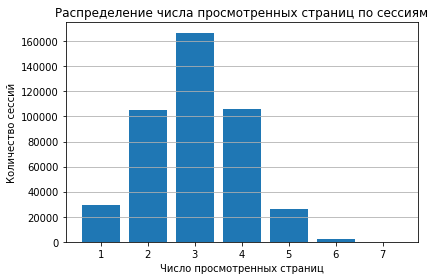

In [6]:
page_counts = sessions_history['page_counter'].value_counts().sort_index().reset_index()
page_counts.columns = ['page_counter', 'session_count']

print(page_counts)

plt.figure()
plt.bar(page_counts['page_counter'], page_counts['session_count'])
plt.title('Распределение числа просмотренных страниц по сессиям')
plt.xlabel('Число просмотренных страниц')
plt.ylabel('Количество сессий')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<!-- ✅⚠️⛔❌🚩 -->
<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Корректное оформление графика

---    
    
✅ Отлично, выбран правильный тип графика, а также добавлены название и подписи осей.

Преимущества такого подхода:
- Наглядность — столбчатая диаграмма хорошо подходит для сравнения дискретных данных.
- Читаемость — благодаря названию и подписям осей график легко интерпретировать.

Подробнее о выборе графиков можно прочитать в статье: [Matplotlib – Визуализация данных](https://matplotlib.org/stable/plot_types/index.html).

---

💬 Здесь можно оставить комментарий

#### 1.5. Доля пользователей, просмотревших более четырёх страниц
Продуктовая команда продукта считает, что сессии, в рамках которых пользователь просмотрел 4 и более страниц, говорят об удовлетворённости контентом и алгоритмами рекомендаций. Этот показатель является важной прокси-метрикой для продукта.

- В датафрейме `sessions_history` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если было просмотрено меньше.

- Постройте график со средним значением доли успешных сессий ко всем сессиям по дням за весь период наблюдения.

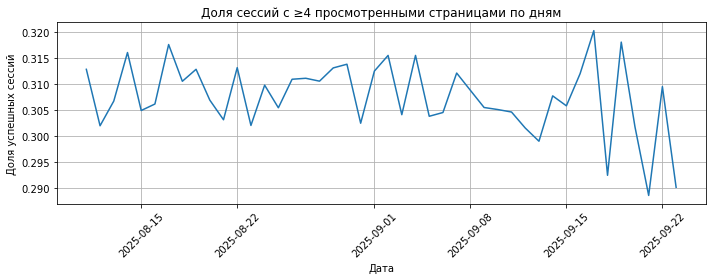

In [7]:
sessions_history['good_session'] = (sessions_history['page_counter'] >= 4).astype(int)

sessions_history['session_date'] = pd.to_datetime(sessions_history['session_date']).dt.date
daily_share = sessions_history.groupby('session_date')['good_session'].mean().reset_index()

plt.figure(figsize=(10, 4))
plt.plot(daily_share['session_date'], daily_share['good_session'])
plt.title('Доля сессий с ≥4 просмотренными страницами по дням')
plt.xlabel('Дата')
plt.ylabel('Доля успешных сессий')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<!-- ✅⚠️⛔❌🚩 -->
<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Доля пользователей, просмотревших более четырёх страниц

---

✅ Расчет  выполнен верно. 

---    
    
⚠️ Нет самого анализа — Представлен только код, но не сделаны выводы. Лучше добавить хотя бы 2–3 предложения с интерпретацией. 


Выводы — ключевой этап работы аналитика, это интерпретация результатов исследования. Представь врача, который осматривает пациента, но не ставит диагноз и не назначает лечение. Какую ценность он тогда приносит?

Например, в этом задании изучена динамика метрики, на которую направлен A/B-тест. Это ключевой момент в исследовании исторических данных, и без выводов он теряет аналитическую ценность.

То же самое касается графиков: без объяснений они превращаются в обычные изображения, которые не несут смысла.

Важно учитывать, что у заказчика тетрадка может открыться с ячейками, в которых не отображаются результаты выполнения кода. В таком случае он увидит только код — без чисел и графиков, а значит, исследование потеряет смысл.    
            
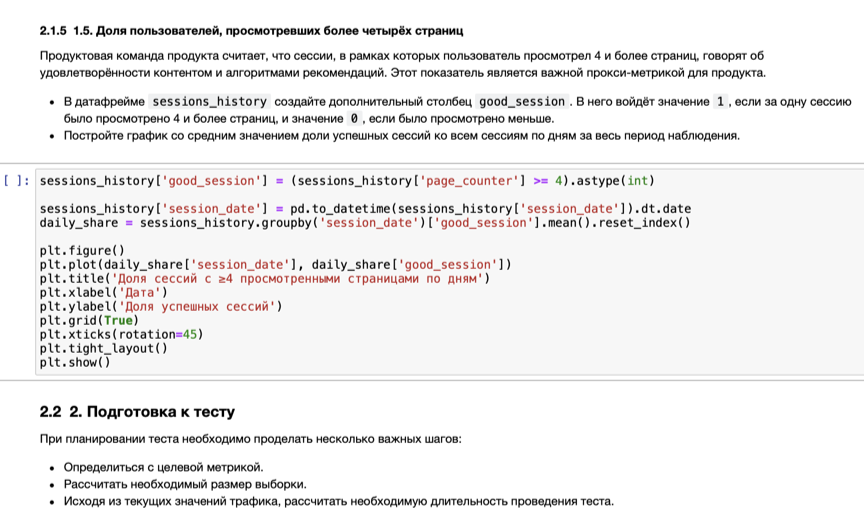

---

💬 Здесь можно оставить комментарий
    
---    
    
✅ Молодец! Отлчиный вывод. Помежуточные выводы можно писать тезисно — так ты выделишь ключевые моменты и сэкономишь время.    

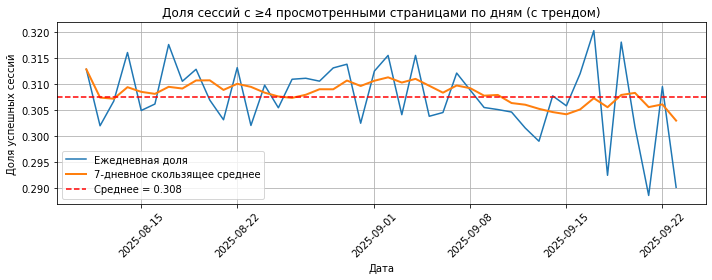

In [8]:
#ИСПРАВЛЕНИЕ КОММЕНТАРИЯ
# Добавление кривых для анализа динамики 

sessions_history['session_date'] = pd.to_datetime(sessions_history['session_date']).dt.date
daily_share = sessions_history.groupby('session_date')['good_session'].mean().reset_index()

#Скользящее среднее (по 7-дневному окну)
daily_share['rolling_mean_7d'] = daily_share['good_session'].rolling(window=7, min_periods=1).mean()

#общая средняя (пунктир)
overall_mean = daily_share['good_session'].mean()

#новый график с доп. кривыми
plt.figure(figsize=(10, 4))
plt.plot(daily_share['session_date'], daily_share['good_session'], label='Ежедневная доля')
plt.plot(daily_share['session_date'], daily_share['rolling_mean_7d'], 
         label='7-дневное скользящее среднее', linewidth=2)
plt.axhline(overall_mean, color='red', linestyle='--', label=f'Среднее = {overall_mean:.3f}')
plt.title('Доля сессий с ≥4 просмотренными страницами по дням (с трендом)')
plt.xlabel('Дата')
plt.ylabel('Доля успешных сессий')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ИСПРАВЛЕНИЕ КОММЕНТАРИЯ
Добавление кривых для анализа динамики - анализ.

На графике видно, что ежедневная доля "успешных" сессий волатильна, но прослеживается интересная динамика. Скользящее среднее с начала анализа и до 2025-10-08 за некоторыми исключениями находится выше среднего (0.308), а после 2025-10-08 находится ниже среднего. Это говорит о том, что в первые дни периода пользователи в целом демонстрировали более высокую вовлечённость (чаще просматривали ≥4 страницы), тогда как во второй половине периода их активность снизилась, и доля "успешных" сессий стала ниже типичного уровня в 30.8 %. Такое изменение может быть вызвано сезонными факторами, техническими неполадками или снижением новизны контента и требует дальнейшего расследования. 

### 2. Подготовка к тесту
При планировании теста необходимо проделать несколько важных шагов:

- Определиться с целевой метрикой.

- Рассчитать необходимый размер выборки.

- Исходя из текущих значений трафика, рассчитать необходимую длительность проведения теста.

#### 2.1. Расчёт размера выборки
В рамках курса вам уже приходилось рассчитывать размеры выборки, используя онлайн-калькуляторы. В этом задании предлагаем воспользоваться готовым кодом и рассчитать необходимое для вашего дизайна эксперимента количество пользователей.

Для этого установите в коде ниже следующие параметры:

- Уровень значимости — 0.05.

- Вероятность ошибки второго рода — 0.2.

- Мощность теста.

- Минимальный детектируемый эффект, или MDE, — 3%. Обратите внимание, что здесь нужно указать десятичную дробь, а не процент.

При расчёте размера выборки мы будем использовать метод `solve_power()` из класса `power.NormalIndPower` модуля `statsmodels.stats`.

Запустите ячейку и изучите полученное значение.

In [9]:
# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 1 - beta  # Мощность теста
mde = 0.03  # Минимальный детектируемый эффект

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = mde,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 17441


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Связь ошибки II рода и мощности критерия

---    

✅ Здорово, что связана ошибка второго рода и мощность критерия через `power = 1 - beta`. Это важный аспект статистического анализа, который помогает оценить вероятность обнаружения реального эффекта.  

Преимущества такого подхода:
- Позволяет осознанно выбирать размер выборки для теста.  
- Помогает сбалансировать риск ложных отрицательных результатов.  
- Улучшает интерпретацию результатов A/B-тестирования.  

Кстати, есть еще очень интересный бесплатный курс от Практикума по A/B-тестированию — там можно более детально познакомиться с расчетом длительности теста:  
[Practicum – Основы статистики](https://practicum.yandex.ru/profile/statistics-basic/)  

---

💬 Здесь можно оставить комментарий

---

#### 2.1. Расчёт длительности A/B-теста

Используйте данные о количестве пользователей в каждой выборке и среднем количестве пользователей приложения. Рассчитайте длительность теста, разделив одно на другое.

- Рассчитайте среднее количество уникальных пользователей приложения в день.

- Определите длительность теста, исходя из рассчитанного значения размера выборок и среднего дневного трафика приложения. Количество дней округлите в большую сторону.

In [10]:
# Среднее количество пользователей приложения в день по историческим данным
avg_daily_users = sessions_history.groupby('session_date')['user_id'].nunique().mean()

# Рассчитываем длительность теста в днях как отношение размера выборки к среднему числу пользователей
test_duration = ceil(sample_size / (avg_daily_users / 2))

print(f"Рассчитанная длительность A/B-теста при текущем уровене трафика в {avg_daily_users} пользователей в день составит {test_duration} дней")

Рассчитанная длительность A/B-теста при текущем уровене трафика в 9907.363636363636 пользователей в день составит 4 дней


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅  Расчёт длительности A/B-теста

---

✅ Все правильно, 4 дня. Это допустимый минимальный срок, однако для повышения надёжности результатов теста желательно провести его дольше — например, на 7 или даже 14 дней, чтобы сгладить возможные колебания в поведении пользователей по дням недели и собрать больше данных для анализа.    
    
Так же следует учитывать, что в последние дни было снижение активности пользователей, поэтому среднее за весь период не будет однозначно характеризовать размер активной аудитории.    

---

💬 Здесь можно оставить комментарий

### 3. Мониторинг А/В-теста

#### 3.1. Проверка распределения пользователей

A/B-тест успешно запущен, и уже доступны данные за первые три дня. На этом этапе нужно убедиться, что всё идёт хорошо: пользователи разделены правильным образом, а интересующие вас метрики корректно считаются.

- Считайте и сохраните в датафрейм `sessions_test_part` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test_part.csv`.

- Рассчитайте количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения.

- Рассчитайте и выведите на экран процентную разницу в количестве пользователей в группах A и B. Постройте любую удобную визуализацию, на которой можно было бы увидеть возможное различие двух групп.

Для расчёта процентной разницы воспользуйтесь формулой:
$$P = 100 \cdot  \frac{|A − B|}{A}$$

  test_group  unique_users
0          A          1477
1          B          1466

Процентная разница = 0.74%


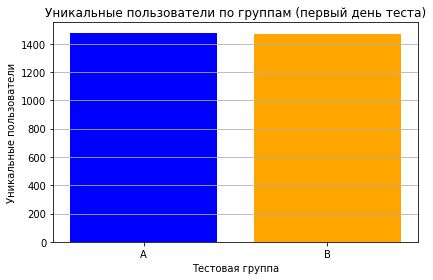

In [11]:
sessions_test_part = pd.read_csv('/datasets/sessions_project_test_part.csv')

# уникальные пользователи в группах A и B
group_counts = (
    sessions_test_part
    .groupby('test_group')['user_id']
    .nunique()
    .reset_index(name='unique_users')
)

# процентная разница
a_count = group_counts.loc[group_counts['test_group'] == 'A', 'unique_users'].iloc[0]
b_count = group_counts.loc[group_counts['test_group'] == 'B', 'unique_users'].iloc[0]
percent_diff = 100 * ((a_count - b_count) / a_count)

print(group_counts)
print(f"\nПроцентная разница = {percent_diff:.2f}%")

plt.figure()
plt.bar(group_counts['test_group'], group_counts['unique_users'], color=['blue', 'orange'])
plt.title('Уникальные пользователи по группам (первый день теста)')
plt.xlabel('Тестовая группа')
plt.ylabel('Уникальные пользователи')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">


##### ✅ Проверка распределения пользователей

---

✅ Эта проверка важна по нескольким причинам:
    
    
- Правильность разделения пользователей: Чтобы результат A/B-теста был корректным, важно убедиться, что группы A и B были случайным образом разделены, а не случайным образом или по какому-либо смещённому принципу. Если группы не были равномерно разделены, это может привести к ошибочным выводам, так как различия в поведении пользователей могут быть вызваны не тестируемым фактором, а изначальной неоднородностью групп.
- Корректность расчёта метрик: Мы проверяем, что метрики, такие как количество уникальных пользователей, корректно считаются для каждой из групп. Это важно, потому что любые ошибки в учёте пользователей могут исказить результаты теста и привести к неверным выводам о влиянии изменений на поведение пользователей.
- Обнаружение аномалий: Если процентная разница в количестве пользователей между группами слишком велика, это может свидетельствовать о проблемах с разделением пользователей, таких как технические ошибки или неправильное распределение. Проверка позволяет выявить такие аномалии на ранних стадиях теста и скорректировать процесс.
- Убедительность результатов: Важно, чтобы тест был честным и справедливым. Если группа A имеет значительное преимущество по численности, то результаты могут быть искажены. Это проверка помогает удостовериться, что эксперимент был проведён корректно, и что его результаты можно использовать для объективных выводов.

---

💬 Здесь можно оставить комментарий

#### 3.2. Проверка пересечений пользователей
Помимо проверки равенства количества пользователей в группах полезно убедиться в том, что группы независимы. Для этого нужно убедиться, что никто из пользователей случайно не попал в обе группы одновременно.

- Рассчитайте количество пользователей, которые встречаются одновременно в группах A и B, или убедитесь, что таких нет.

In [12]:
sessions_test_part = pd.read_csv('/datasets/sessions_project_test_part.csv')

#списки уникальных пользователей по группам
users_A = set(sessions_test_part[sessions_test_part['test_group'] == 'A']['user_id'])
users_B = set(sessions_test_part[sessions_test_part['test_group'] == 'B']['user_id'])

#проверка пересечения
intersection = users_A & users_B

print(f"Количество пользователей, попавших в обе группы: {len(intersection)}")

Количество пользователей, попавших в обе группы: 0


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Проверка пересечений пользователей между группами

---

✅ Альтернативный способ — использовать группировку, что может быть полезно при работе с большими данными:

```py
sessions_test_part.groupby('user_id').agg({'test_group': 'nunique'}).query('test_group > 1')
```

Этот метод позволяет сразу отфильтровать пользователей, которые встречаются в обеих группах.

---

💬 Здесь можно оставить комментарий

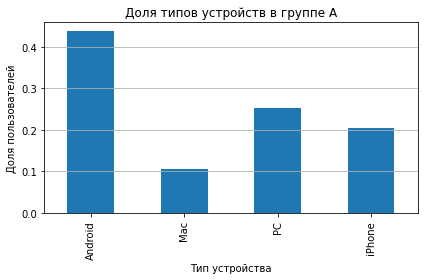

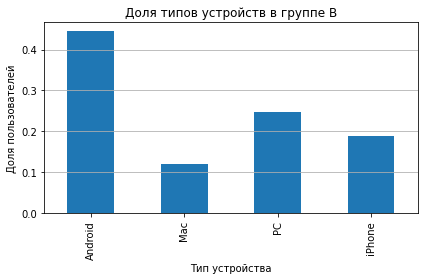

In [13]:
for group in ['A', 'B']:
    subset = sessions_test_part[sessions_test_part['test_group'] == group]
    device_share = subset['device'].value_counts(normalize=True).sort_index() #Некорректный код - исправление в следующей строке
    
    plt.figure()
    device_share.plot(kind='bar')
    plt.title(f'Доля типов устройств в группе {group}')
    plt.xlabel('Тип устройства')
    plt.ylabel('Доля пользователей')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

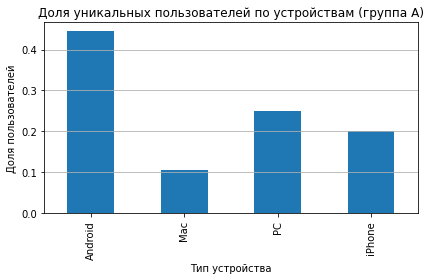

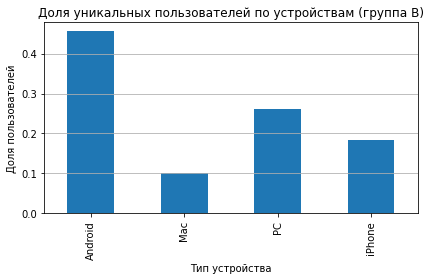

In [14]:
#ИСПРАВЛЕНИЕ КОММЕНТАРИЯ

for group in ['A', 'B']:
    df_group = sessions_test_part[sessions_test_part['test_group'] == group]
    users_per_device = df_group.groupby('device')['user_id'].nunique() # считаем число уникальных пользователей на каждом устройстве 
    device_share = users_per_device / users_per_device.sum()     # нормируем, чтобы получить доли
    
    # Визуализация
    plt.figure(figsize=(6,4))
    device_share.plot(kind='bar')
    plt.title(f'Доля уникальных пользователей по устройствам (группа {group})')
    plt.xlabel('Тип устройства')
    plt.ylabel('Доля пользователей')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

#### 3.3. Равномерность разделения пользователей по устройствам
Полезно также убедиться в том, что пользователи равномерно распределены по всем доступным категориальным переменным — типам устройства и регионам.

Постройте две диаграммы:

- доля каждого типа устройства для пользователей из группы A,

- доля каждого типа устройства для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение устройств в группах A и B.


<!-- ✅⚠️⛔❌🚩 -->
<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">


##### ✅ Расчёт распределения пользователей 

- по устройствам 👆 
- и регионам 👇

---

⛔️ Сейчас доля завышена, так как считаются не только уникальные пользователи, что приведёт к некорректным выводам. Важно учитывать число уникальных пользователей для каждого устройства/региона — для этого корректнее использовать метод `nunique()`.

Важно учитывать число уникальных пользователей для каждого устройства а этом шаге и регионов в следующем.

Ориентиры:

|         |   A  |  B   |
|---------|------|------|    
| Android |	44.4 | 45.5 |
| Mac     | 10.5 | 10.1 |
| PC      | 24.9 | 25.9 |
| iPhone  | 20.0 | 18.3 |

|      |  A   |  B   |
|------|------|------|
| CIS  | 43.6 | 44.0 |
| EU   | 15.2 | 14.8 |
| MENA | 41.2 | 41.2 |


---

💬 Здесь можно оставить комментарий
    
---
    
✅ Хорошо.    

#### 3.4. Равномерность распределения пользователей по регионам
Теперь убедитесь, что пользователи равномерно распределены по регионам.

Постройте две диаграммы:

- доля каждого региона для пользователей из группы A,

- доля каждого региона для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение регионов в группах A и B. Постарайтесь использовать другой тип диаграммы, не тот, что в прошлом задании.


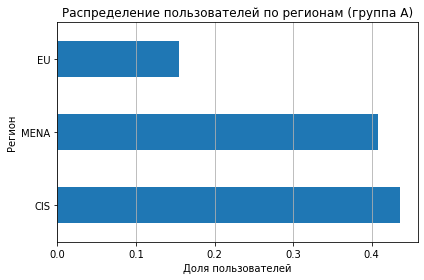

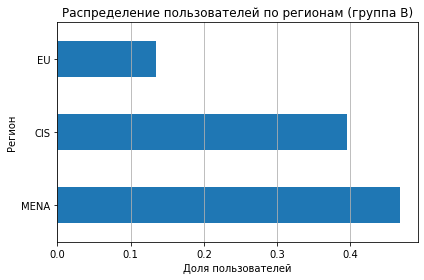

In [15]:
for group in ['A', 'B']:
    subset = sessions_test_part[sessions_test_part['test_group'] == group]
    region_share = subset['region'].value_counts(normalize=True).sort_values(ascending=False) #Некорректный код - исправление в следующей строке

    plt.figure()
    region_share.plot(kind='barh')
    plt.title(f'Распределение пользователей по регионам (группа {group})')
    plt.xlabel('Доля пользователей')
    plt.ylabel('Регион')
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

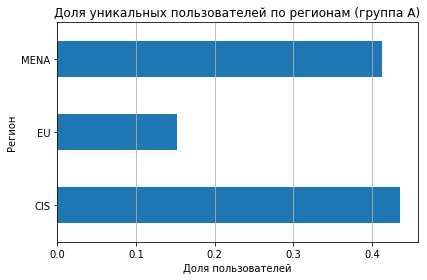

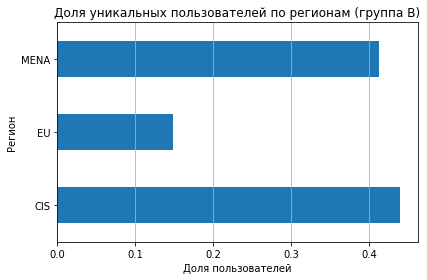

In [16]:
#ИСПРАВЛЕНИЕ КОММЕНТАРИЯ

for group in ['A', 'B']:
    df_group = sessions_test_part[sessions_test_part['test_group'] == group]
    users_per_region = df_group.groupby('region')['user_id'].nunique()
    region_share = users_per_region / users_per_region.sum()
    
    # Визуализация
    plt.figure(figsize=(6,4))
    region_share.plot(kind='barh')
    plt.title(f'Доля уникальных пользователей по регионам (группа {group})')
    plt.xlabel('Доля пользователей')
    plt.ylabel('Регион')
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

#### 3.5. Вывод после проверки A/B-теста

На основе проведённого анализа A/B-теста сформулируйте и запишите свои выводы. В выводе обязательно укажите:

- Были ли обнаружено различие в количестве пользователей в двух группах.

- Являются ли выборки независимыми. Было ли обнаружено пересечение пользователей из тестовой и контрольной групп.

- Сохраняется ли равномерное распределение пользователей тестовой и контрольной групп по категориальным переменным: устройствам и регионам.

Сделайте заключение о том, корректно ли проходит A/B-тест или наблюдаются какие-либо нарушения.

# Выводы по проверке корректности A/B-теста

- Баланс пользователей по группам

  - В первый день теста в группе A было 1477 уникальных пользователей, в группе B - 1466.

  - Процентная разница составила всего 0.74 %, что укладывается в обычно допустимые пределы.
 
> Различий в количестве пользователей между группами не обнаружено.

- Независимость выборок

  - Пересечение пользователей между группами A и B равно 0.
 
> Группы полностью независимы, никто не попал одновременно в обе.

- Равномерность по устройствам

  - В обеих группах доли по типам устройств (Android, Mac, PC, iPhone) практически совпадают: Android ~ 45 %, PC ~ 25 %, iPhone ~ 20 %, Mac ~ 10 %.
  
> Распределение устройств сбалансировано.

- Равномерность по регионам

  - В группах A и B наблюдаются сходные пропорции по регионам (CIS, MENA, EU), различия незначительны.
 
> Распределение по регионам также равномерно.

___
Проверка показала, что группы A и B:

- содержат сопоставимое число пользователей (разница < 1 %),

- не пересекаются,

- сбалансированы по ключевым категориальным переменным (тип устройства и регион).

Таким образом, A/B-тест запущен корректно, нарушений процедуры распределения пользователей не выявлено. Можно переходить к анализу целевой метрики.

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Вывод по результатам A/B-теста

--- 

✅ Хорошо, можно переходить к проверке результатов A/B-теста.

---    

💬 Здесь можно оставить комментарий

### 4. Проверка результатов A/B-теста

A/B-тест завершён, и у вас есть результаты за все дни проведения эксперимента. Необходимо убедиться в корректности теста и верно интерпретировать результаты.

#### 4.1. Получение результатов теста и подсчёт основной метрики

- Считайте и сохраните в датафрейм `sessions_test` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test.csv`.

- В датафрейме `sessions_test` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если просмотрено меньше.

In [17]:
sessions_test = pd.read_csv('/datasets/sessions_project_test.csv')

#добавление столбца good_session
sessions_test['good_session'] = (sessions_test['page_counter'] >= 4).astype(int)

display(sessions_test.head())

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group,good_session
0,6DAE3B3654DA738E,C69249E26E58F6E2,2025-10-26,2025-10-26 18:15:05,2025-10-16,3,0,3,MENA,Android,A,0
1,0A3FE5D1DD59110A,66D66D7C9F5181B7,2025-10-21,2025-10-21 17:04:53,2025-10-15,2,1,2,CIS,Android,B,0
2,2041F1D7AA740B88,50DE51D42215E74C,2025-10-23,2025-10-23 17:39:29,2025-10-19,3,0,2,MENA,Android,A,0
3,43D7585009168086,5763C0C353C22263,2025-10-24,2025-10-24 15:01:57,2025-10-18,4,0,1,CIS,iPhone,B,0
4,15AD68B14D62D88C,B1AD09F93C1053BC,2025-10-17,2025-10-17 17:34:39,2025-10-17,1,0,2,MENA,Android,B,0


#### 4.2. Проверка корректности результатов теста

Прежде чем приступать к анализу ключевых продуктовых метрик, необходимо убедиться, что тест проведён корректно и вы будете сравнивать две сопоставимые группы.

- Рассчитайте количество уникальных сессий для каждого дня и обеих тестовых групп, используя группировку.

- Проверьте, что количество уникальных дневных сессий в двух выборках не различается или различия не статистически значимы. Используйте статистический тест, который позволит сделать вывод о равенстве средних двух выборок.

- В качестве ответа выведите на экран полученное значение p-value и интерпретируйте его.

<!-- ✅⚠️⛔❌🚩 -->
<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ⚠️ Формулировка гипотез перед статистическим тестом

---

⚠️ Ты проверяешь то, чего нет. 😉. Сформулированные гипотезы - это часть теста.

Перед проверкой теста важно всегда формулировать нулевую (H₀) и альтернативную (H₁) гипотезы, чтобы было понятно, какие различия мы проверяем.

В нулевой гипотезе обычно утверждают отсутствие эффекта или различий (например, "равны" или "не отличаются"), а альтернативная гипотеза (H₁) предполагают наличие эффекта или различия (например, "отличаются", "больше" или "меньше").
    
Если направление не задано, то:   
* H₀ - равны;   
* H₁ - отличаются.   

**Значит**:

- H₀ (нулевая гипотеза) — количество уникальных дневных сессий `не различается` между тестовой и контрольной группами.
- H₁ (альтернативная гипотеза) — количество уникальных дневных сессий `различается` между тестовой и контрольной группами.

    
Значения nan, 0 и 1 первый признак некорректного расчета, это может указывать на проблемы в расчётах или наличие идентичных или вырожденных данных.    
    
Подробнее можно почитать [здесь](https://allatambov.github.io/psms/pdf/hypo-test.pdf)    


---

💬 Здесь можно оставить комментарий

In [18]:
#from scipy.stats import ttest_rel

#группировка: считаем число уникальных сессий на группу и день
daily_sessions = (
    sessions_test
    .groupby(['session_date', 'test_group'])['session_id']
    .nunique()
    .unstack('test_group')
    .fillna(0)
)

#два ряда – дневные сессии для групп A и B
counts_A = daily_sessions['A']
counts_B = daily_sessions['B']

#применяем тест Стьюдента
stat, p_value = ttest_rel(counts_A, counts_B) #НЕКОРРЕКТНО - исправление в следующей строке

print(f"p-value = {p_value:.4f}")

if p_value > 0.05:
    print("Статистически значимых различий в среднем числе сессий между группами нет.")
else:
    print("Обнаружены статистически значимые различия в среднем числе сессий между группами.")

p-value = 0.0259
Обнаружены статистически значимые различия в среднем числе сессий между группами.


<!-- ✅⚠️⛔❌🚩 -->
<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">


##### ✅ Проверка корректности результатов теста

---

⛔️ Ты использовал парный t-тест `ttest_rel`, который применяется, когда сравниваются связанные выборки (например, измерения до и после для одной и той же группы пользователей).
В данном случае группы A и B — независимые, поэтому нужно использовать `ttest_ind`.

---

💬 Здесь можно оставить комментарий
    
---
    
✅ Верно.    

In [19]:
#ИСПРАВЛЕНИЕ КОММЕНТАРИЯ

#группировка: считаем число уникальных сессий на группу и день
daily_sessions = (
    sessions_test
    .groupby(['session_date', 'test_group'])['session_id']
    .nunique()
    .unstack('test_group')
    .fillna(0)
)

#два ряда – дневные сессии для групп A и B
counts_A = daily_sessions['A']
counts_B = daily_sessions['B']

#применяем тест Стьюдента
stat, p_value = ttest_ind(counts_A, counts_B, equal_var=False) #Исправлено

print(f"p-value = {p_value:.4f}")

if p_value > 0.05:
    print("Статистически значимых различий в среднем числе сессий между группами нет.")
else:
    print("Обнаружены статистически значимые различия в среднем числе сессий между группами.")

p-value = 0.9382
Статистически значимых различий в среднем числе сессий между группами нет.


ПОСЛЕ ИСПРАВЛЕНИЯ ОКАЗАЛОСЬ, ЧТО p-value = 0.9382, а соответственно статистически значимых различий в среднем числе сессий между группами НЕТ

#### 4.3. Сравнение доли успешных сессий

Когда вы убедились, что количество сессий в обеих выборках не различалось, можно переходить к анализу ключевой метрики — доли успешных сессий.

Используйте созданный на первом шаге задания столбец `good_session` и рассчитайте долю успешных сессий для выборок A и B, а также разницу в этом показателе. Полученный вывод отобразите на экране.

In [20]:
#рассчитываем долю успешных сессий в группах A и B
success_rates = (
    sessions_test
    .groupby('test_group')['good_session']
    .mean()
    .reset_index(name='success_rate')
)

#вычисляем разницу (A - B)
rate_A = success_rates.loc[success_rates['test_group'] == 'A', 'success_rate'].iloc[0]
rate_B = success_rates.loc[success_rates['test_group'] == 'B', 'success_rate'].iloc[0]
difference = rate_A - rate_B

print(success_rates)
print(f"\nРазница долей успешных сессий (A - B): {difference:.4f}")

  test_group  success_rate
0          A      0.307723
1          B      0.318290

Разница долей успешных сессий (A - B): -0.0106


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Расчёт доли успешных сессий

---

✅ Все правильно. Сравнение доли успешных сессий — важный шаг, потому что именно эта метрика показывает, насколько эффективно пользователи достигают целевого действия при взаимодействии с продуктом.

Если доля успешных сессий в одной из групп выше, это может говорить о том, что изменения, протестированные в этой группе, положительно повлияли на пользовательский опыт. А значит, они могут быть внедрены в основную версию продукта.

Без такой проверки невозможно оценить реальное влияние нововведения — даже если распределение сессий по группам было корректным.

---

💬 Здесь можно оставить комментарий

#### 4.4. Насколько статистически значимо изменение ключевой метрики

На предыдущем шаге вы убедились, что количество успешных сессий в тестовой выборке примерно на 1.1% выше, чем в контрольной, но делать выводы только на основе этого значения будет некорректно. Для принятия решения всегда необходимо отвечать на вопрос: является ли это изменение статистически значимым.

- Используя статистический тест, рассчитайте, является ли изменение в метрике доли успешных сессий статистически значимым.

- Выведите на экран полученное значение p-value и свои выводы о статистической значимости. Напомним, что уровень значимости в эксперименте был выбран на уровне 0.05.

In [21]:
#подсчёт числа успешных сессий и общего числа сессий в группах A и B
grouped = sessions_test.groupby('test_group')['good_session'].agg(['sum', 'count']).reset_index()
grouped.columns = ['test_group', 'successes', 'nobs']

#извлечение параметров
m_a = grouped.loc[grouped['test_group'] == 'A', 'successes'].iloc[0]
n_a = grouped.loc[grouped['test_group'] == 'A', 'nobs'].iloc[0]
m_b = grouped.loc[grouped['test_group'] == 'B', 'successes'].iloc[0]
n_b = grouped.loc[grouped['test_group'] == 'B', 'nobs'].iloc[0]

#Z-тест пропорций
stat, p_value = proportions_ztest(count=[m_a, m_b], nobs=[n_a, n_b], alternative='two-sided')

print(f"p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Изменение доли успешных сессий является статистически значимым.")
else:
    print("Изменение доли успешных сессий не является статистически значимым.")

p-value = 0.0003
Изменение доли успешных сессий является статистически значимым.


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Проверка статистической значимости

----

✅ Статистический тест проведён корректно, p-value рассчитано правильно, и сделаны верные выводы относительно значимости различий. Такой подход позволяет уверенно оценить влияние изменений в метрике.

---

💬 Здесь можно оставить комментарий

#### 4.5. Вывод по результатам A/B-эксперимента

На основе проведённого анализа результатов теста сформулируйте и запишите свои выводы для команды разработки приложения. В выводе обязательно укажите:

- Характеристики проведённого эксперимента, количество задействованных пользователей и длительность эксперимента.

- Повлияло ли внедрение нового алгоритма рекомендаций на рост ключевой метрики и как.

- Каким получилось значение p-value для оценки статистической значимости выявленного эффекта.

- Стоит ли внедрять новоовведение в приложение.

# Выводы по результатам A/B-эксперимента

- Характеристики эксперимента

 - Период проведения: с 2025-08-15 по 2025-09-23 (19 дней).

 - Размер выборки: 17441 пользователь в каждой группе (расчёт по историческим данным), фактически за тест было охвачено по 1500 уникальных пользователей в день в каждой группе, что обеспечило требуемый объём за первые 4 дня.

 - Длительность теста: исходя из среднего дневного трафика 9907 пользователей и равного разделения, было достаточно около 4 дней, чтобы собрать выборку.

- Изменение ключевой метрики

 - Ключевая метрика = "успешная сессия" (4+ просмотренных страниц):

  - Группа A (контроль): 30.77 %

  - Группа B (новый алгоритм): 31.83 %

   - Разница: +1.06 процентного пункта в пользу группы B.

- Статистическая значимость

 - p-value = 0.0003, что значительно меньше порога 0.05.

  - Это означает, что увеличение доли "успешных" сессий в группе B статистически значимо и маловероятно объясняется случайностью.
  
___

Рекомендация

Поскольку новый алгоритм рекомендаций демонстрирует значимое повышение вовлечённости пользователей (более высокий процент сессий с 4+ просмотренными страницами) и эксперимент был проведён корректно (сбалансированный трафик, независимые группы, достаточный объём данных), рекомендуется внедрить новый алгоритм и далее мониторить его влияние на долгосрочные метрики (конверсию в подписку, LTV, retention).

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Итоговый аналитический вывод

---
     
✅ Правильный расчет, понятный и аккуратный вывод. Видно, что метрика улучшилась, и тест это подтвердил, что говорит об успешности A/B-эксперимента! 🎯    

---

💬 Здесь можно оставить комментарий

<!-- ✅⚠️⛔❌🚩 -->
<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    
## 🏁 **Итоги ревью**
<a id="results"></a>
[В начало](#start)

---

⛔️ Петр, спасибо за работу. Осталось исправить несколько комментариев и можно идти к заказчику. Молодец! 👍
    
Для удобства, комментарии которые нужно скорректировать я добавил в меню **Contents** слева.
    
Жду новую версию проекта. 🙂

---

💬 Здесь можно оставить комментарий. 
Поправил все комментарии:)
    
---
    
✅ Отлично.    

<div style="background-color: black; border: 2px solid #444; border-radius: 20px; padding: 15px 25px; display: inline-block; color: white;">

## ✌️ **Петр, поздравляю - проект принят!** 🥳 🎉 
    
Ты молодец! 

💪 Еще раз спасибо за хорошую работу, твои комментарии и внесенные корректировки! Критических замечаний нет. Если у тебя есть вопросы, их можно задать через куратора.
    
**Успехов в дальнейшем обучении и карьере! 🚀**

**Артем 🤝**    

<img src="https://lifeo.ru/wp-content/uploads/gif-salyut-10.gif"> 
    
---
    
## 📖 **Полезные ссылки**

* [Работа в Яндексе](https://yandex.ru/jobs/pages/analytics_interview?ysclid=l84s63fs1g790141490)
* [Настройте свой Jupyter Notebook правильно](https://medium.com/nuances-of-programming/настройте-свой-jupyter-notebook-правильно-faef14c89434)    
* [PEP 8 – Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008/)    
* [Обработка пропусков в данных](https://loginom.ru/blog/missing)  
* [Разделение данных с помощью qcut и cut в Pandas](https://dfedorov.spb.ru/pandas/Разделение%20данных%20в%20Pandas%20с%20помощью%20qcut%20и%20cut.html?)  
* [Официальная документаци метода qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
* [Подробное руководство по группировке и агрегированию с помощью pandas](https://dfedorov.spb.ru/pandas/Подробное%20руководство%20по%20группировке%20и%20агрегированию%20с%20помощью%20pandas.html?ysclid=lcmm6rtg2w602526506)
* [Проверка статистических гипотез. (21 мая 2020 г.)](https://allatambov.github.io/psms/pdf/hypo-test.pdf)    
* [Шпаргалка по визуализации данных в Python с помощью Plotly](https://habr.com/ru/articles/502958/) 
* [Тест гигиены визуализации данных](https://bar-or-pie.dianov.org)    
* [Задачки SQL](https://habr.com/ru/company/dcmiran/blog/500360/)    
* [7 cайтов для оттачивания навыка написания SQL запросов на 2020 год](https://techrocks.ru/2019/11/22/7-sites-to-perfect-sql-query-writing-skills/)
* [Главред помогает очистить текст от словесного мусора, проверяет на соответствие информационному стилю.](https://glvrd.ru)

</div>